# Data Cleaning & EDA

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import seaborn as sns
from wordcloud import WordCloud
import collections
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elizahambali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# read apple posts
apple_posts = pd.read_csv('../datasets/posts_apple.csv')

# read samsung posts
samsung_posts = pd.read_csv('../datasets/posts_samsung.csv')

In [3]:
print(apple_posts.shape)
print(samsung_posts.shape)

(1404, 8)
(1436, 8)


In [4]:
print(apple_posts.info())
print('\n')
print(samsung_posts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1404 non-null   object 
 1   score         1404 non-null   int64  
 2   id            1404 non-null   object 
 3   subreddit     1404 non-null   object 
 4   url           1404 non-null   object 
 5   num_comments  1404 non-null   int64  
 6   body          663 non-null    object 
 7   created       1404 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 87.9+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1436 non-null   object 
 1   score         1436 non-null   int64  
 2   id            1436 non-null   object 
 3   subreddit     1436 non-null   object 
 4   url           1436 non-nu

In [5]:
#concat apple_posts title and body 
apple_messages = pd.concat([apple_posts['title'],apple_posts['body']],axis=1)
apple_messages.head(2)

title  \
0               Daily Advice Thread - March 03, 2023   
1  Apple now charges more for iPhone, iPad and Ma...   

                                                body  
0  Welcome to the Daily Advice Thread for /r/Appl...  
1                                                NaN

In [6]:
#concat samsung_posts title and body 
samsung_messages = pd.concat([samsung_posts['title'],samsung_posts['body']],axis=1)
samsung_messages.head(2)

title  \
0                               Daily Support Thread   
1  Owner of pack and ship store, returned Samsung...   

                                                body  
0  Welcome to the Daily Support thread for [r/Sam...  
1  I thought the issue was kind of ridiculous and...

In [7]:
# no of NaN under apple_messages
apple_messages.isnull().sum()

title      0
body     741
dtype: int64

In [8]:
# no of NaN under samsung_messages
samsung_messages.isnull().sum()

title      0
body     106
dtype: int64

In [9]:
#replace NaN with ;
apple_messages = apple_messages.fillna(';')
samsung_messages = samsung_messages.fillna(';')

#check
print(apple_messages)
print(samsung_messages)

                                                  title  \
0                  Daily Advice Thread - March 03, 2023   
1     Apple now charges more for iPhone, iPad and Ma...   
2     Sources: Apple Planning Product Briefing Next ...   
3     Apple Rumored to Announce 15-Inch MacBook Air ...   
4     New Foxconn plant in India may be half the siz...   
...                                                 ...   
1399  Users of macos Ventura - what is your experien...   
1400                   MacOS scans your local files now   
1401  I wanted to be able to export/backup iMessage ...   
1402                                 15 years ago today   
1403  Apple's Custom MicroLED Displays Likely Headin...   

                                                   body  
0     Welcome to the Daily Advice Thread for /r/Appl...  
1                                                     ;  
2                                                     ;  
3                                                     ;  
4

In [10]:
# combine them together into a list
apple_messages = apple_messages['title'] + ' ' + apple_messages['body']
samsung_messages = samsung_messages['title'] + ' ' + samsung_messages['body']

# check
print('Apple Messages')
print(list(apple_messages.head()))
print('\n')
print('=======================================================================================================')
print('\n')
print('Samsung Messages')
print(list(samsung_messages.head()))

Apple Messages
['Daily Advice Thread - March 03, 2023 Welcome to the Daily Advice Thread for /r/Apple. This thread can be used to ask for technical advice regarding Apple software and hardware, to ask questions regarding the buying or selling of Apple products or to post other short questions.\n\nHave a question you need answered? Ask away! Please remember to adhere to our rules, which can be found in the sidebar.\n\nJoin our Discord and IRC chat rooms for support:\n\n* [Discord](https://discord.gg/apple)\n* [IRC](https://kiwiirc.com/client/irc.snoonet.org/apple?nick=CHANGE_ME)\n\nNote: Comments are sorted by /new for your convenience.\n\n[Here is an archive](https://www.reddit.com/r/apple/search?q=author%3A%22AutoModerator%22+title%3A%22Daily+Advice+Thread%22+or+title%3A%22Daily+Tech+Support+Thread%22&sort=new&t=all) of all previous Daily Advice Threads. This is best viewed on a browser. If on mobile, type in the search bar \\[author:"AutoModerator" title:"Daily Advice Thread" or titl

In [11]:
#save into csv
apple_messages.to_csv(path_or_buf='../datasets/apple_messages_raw.csv',index=False, header = True)
samsung_messages.to_csv(path_or_buf='../datasets/samsung_messages_raw.csv',index=False, header = True)

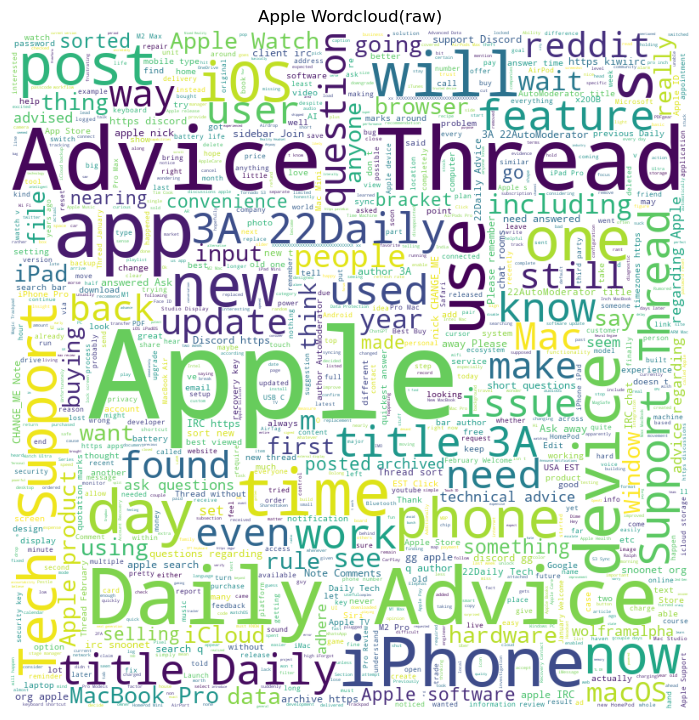

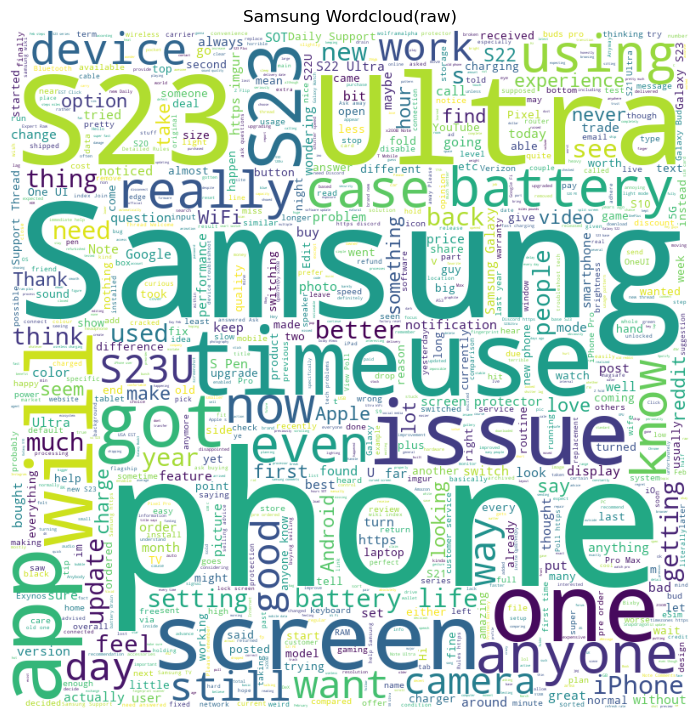

In [12]:
#Create wordcloud for apple messages
# Read in data
apple_messages = pd.read_csv('../datasets/apple_messages_raw.csv', encoding='utf-8')

# Concatenate text
text = ' '.join(apple_messages['0'].tolist())

# Create wordcloud
apple_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000).generate(text)

# Display the wordcloud
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(apple_wordcloud)
plt.axis('off')
plt.title('Apple Wordcloud(raw)')
plt.tight_layout(pad=0)
plt.show()

#Create wordcloud for samsung messages
# Read in data
samsung_messages = pd.read_csv('../datasets/samsung_messages_raw.csv', encoding='utf-8')

# Concatenate text
text = ' '.join(samsung_messages['0'].tolist())

# Create wordcloud
samsung_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000).generate(text)

# Display the wordcloud
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(samsung_wordcloud)
plt.axis('off')
plt.title('Samsung Wordcloud(raw)')
plt.tight_layout(pad=0)
plt.show()

In [13]:
#concat apple_posts w apple_messages
df_apple = pd.concat([apple_posts,apple_messages],axis=1) 

#concat samsung_posts w samsung_messages
df_samsung = pd.concat([samsung_posts,samsung_messages],axis=1) 

In [14]:
# rename columns, change to lower caps, remove punctuations and specials characters

#rename columns
df_apple = df_apple.rename(columns = {'0':'text'})
df_samsung = df_samsung.rename(columns = {'0':'text'})

# change to lower caps
df_apple = df_apple.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
df_samsung = df_samsung.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

# remove punctuations
def remove_punc_spechars(text):
    regex = r'[^a-zA-z0-9\s]'
    text = re.sub(regex, '', text)
    return text

df_apple['text_clean'] = df_apple['text'].apply(remove_punc_spechars)
df_samsung['text_clean'] = df_samsung['text'].apply(remove_punc_spechars)

In [15]:
#check
df_apple.head(2)

title  score       id  \
0               daily advice thread - march 03, 2023     16  11gxv1z   
1  apple now charges more for iphone, ipad and ma...    623  11hc55r   

  subreddit                                                url  num_comments  \
0     apple  https://www.reddit.com/r/apple/comments/11gxv1...            21   
1     apple  https://www.cultofmac.com/807873/apple-charges...           114   

                                                body       created  \
0  welcome to the daily advice thread for /r/appl...  1.677841e+09   
1                                                NaN  1.677871e+09   

                                                text  \
0  daily advice thread - march 03, 2023 welcome t...   
1  apple now charges more for iphone, ipad and ma...   

                                          text_clean  
0  daily advice thread  march 03 2023 welcome to ...  
1  apple now charges more for iphone ipad and mac...

In [16]:
#check
df_samsung.head(2)

title  score       id  \
0                               daily support thread      2  11gxv7o   
1  owner of pack and ship store, returned samsung...    117  11h2opt   

  subreddit                                                url  num_comments  \
0   samsung  https://www.reddit.com/r/samsung/comments/11gx...            21   
1   samsung  https://www.reddit.com/r/samsung/comments/11h2...            36   

                                                body       created  \
0  welcome to the daily support thread for [r/sam...  1.677841e+09   
1  i thought the issue was kind of ridiculous and...  1.677855e+09   

                                                text  \
0  daily support thread welcome to the daily supp...   
1  owner of pack and ship store, returned samsung...   

                                          text_clean  
0  daily support thread welcome to the daily supp...  
1  owner of pack and ship store returned samsung ...

In [17]:
#save into csv
df_apple.to_csv(path_or_buf='../datasets/df_apple.csv',index=False, header = True)
df_samsung.to_csv(path_or_buf='../datasets/df_samsung.csv',index=False, header = True)

## EDA on i) post length, ii) word count, iii) common words, iv) top 20 upvoted post, v) top 20 commmented post vi) count vectorizer and tf-idf

In [18]:
# find out length of text
df_apple['post_len']=df_apple['text_clean'].str.len()
df_samsung['post_len']=df_samsung['text_clean'].str.len()

# find out word count of text
df_apple['word_count'] = df_apple['text_clean'].apply(lambda x: len(str(x).split(" ")))
df_samsung['word_count'] = df_samsung['text_clean'].apply(lambda x: len(str(x).split(" ")))

In [19]:
print('Apple Post Length Stats')
print(df_apple.post_len.describe())
print('\n')
print('Samsung Post Length Stats')
print(df_samsung.post_len.describe())
print('\n')
print('Apple Word Count Stats')
print(df_apple.word_count.describe())
print('\n')
print('Samsung Word Count Stats')
print(df_samsung.word_count.describe())

Apple Post Length Stats
count     1404.000000
mean       517.617521
std        891.224654
min         12.000000
25%         66.000000
50%        107.000000
75%        662.000000
max      11031.000000
Name: post_len, dtype: float64


Samsung Post Length Stats
count    1436.000000
mean      526.023677
std       687.475702
min        21.000000
25%       187.000000
50%       334.500000
75%       600.250000
max      8684.000000
Name: post_len, dtype: float64


Apple Word Count Stats
count    1404.000000
mean       89.020655
std       161.386266
min         3.000000
25%        12.000000
50%        19.000000
75%       119.000000
max      2190.000000
Name: word_count, dtype: float64


Samsung Word Count Stats
count    1436.000000
mean       98.278552
std       128.401750
min         4.000000
25%        35.000000
50%        63.000000
75%       113.000000
max      1633.000000
Name: word_count, dtype: float64


### Summary of Apple Messages Post Length Stats
#### 1. Average post length is 517
#### 2. Min post length is 12 
#### 3. Max post length is 11031 
#### ===========================================
### Summary of Samsung Messages Post Length Stats
#### 1. Average post length is 526
#### 2. Min post length is 21
#### 3. Max post length is 8684
#### ===========================================
### Summary of Apple Messages Word Count Stats
#### 1. Average word count is 89 words
#### 2. Min word count is 3 words
#### 3. Max word count is 2190 words
#### ===========================================
### Summary of Samsung Messages Word Count Stats
#### 1. Average word count is 98 words
#### 2. Min word count is 4 words
#### 3. Max word count is 1633 words

In [20]:
# word frequencies in apple
apple_freq_words = pd.Series(' '.join(df_apple['text_clean']).split()).value_counts()
df_apple_freq_words = pd.DataFrame({'word':apple_freq_words.index,'word_count':apple_freq_words.values})

# word frequencies in samsung
samsung_freq_words = pd.Series(' '.join(df_samsung['text_clean']).split()).value_counts()
df_samsung_freq_words = pd.DataFrame({'word':samsung_freq_words.index,'word_count':samsung_freq_words.values})


[Text(0.5, 1.0, 'Top words with the most frequencies in r/apple')]

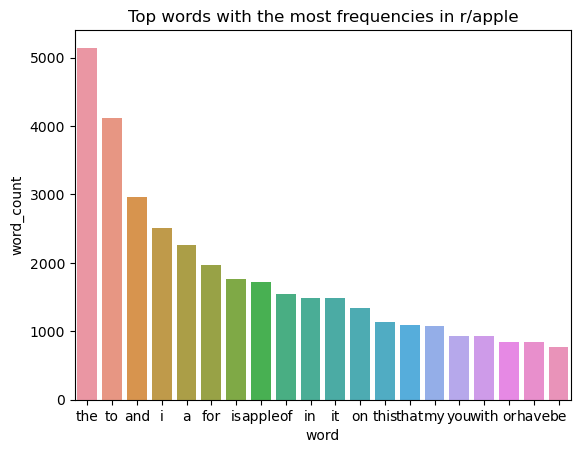

In [21]:
#extract top 20 word frequencies
top_20_freq_applewords=df_apple_freq_words[:20]
plot = sns.barplot(x='word',y='word_count',data=top_20_freq_applewords)
plot.set(title='Top words with the most frequencies in r/apple')


[Text(0.5, 1.0, 'Top words with the most frequencies in r/samsung')]

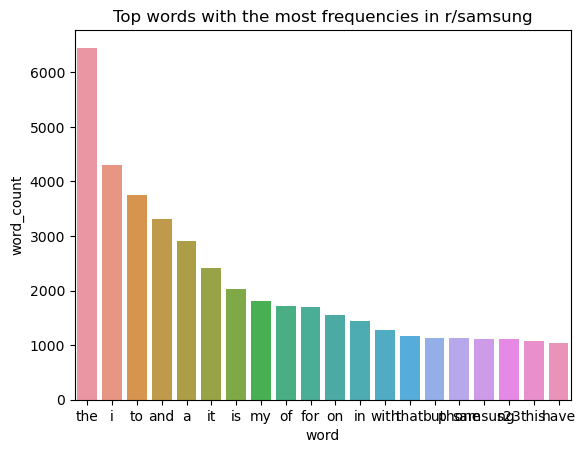

In [22]:
top_20_freq_samsungwords=df_samsung_freq_words[:20]
plot = sns.barplot(x='word',y='word_count',data=top_20_freq_samsungwords)
plot.set(title='Top words with the most frequencies in r/samsung')

In [23]:
# find post with the most scores and num_comments
top_appleupvoted_post = df_apple['score'].sort_values(ascending=False)
top_applecommented_post = df_apple['num_comments'].sort_values(ascending=False)

top_samsungupvoted_post = df_samsung['score'].sort_values(ascending=False)
top_samsungcommented_post = df_samsung['num_comments'].sort_values(ascending=False)

In [24]:
#check for top 20
print('top_appleupvoted_post')
print(top_appleupvoted_post.head(20))
print('==\n==')
print('top_applecommented_post')
print(top_applecommented_post.head(20))
print('==\n==')
print('top_samsungupvoted_post')
print(top_samsungupvoted_post.head(20))
print('==\n==')
print('top_samsungcommented_post')
print(top_samsungcommented_post.head(20))

top_appleupvoted_post
1370    5679
623     5679
747     5677
10      5674
1348    5327
599     5322
142     5292
883     5292
241     5031
984     5025
699     4977
1118    4876
372     4873
768     4670
30      4667
863     4627
110     4625
1239    4592
483     4586
1146    4515
Name: score, dtype: int64
==
==
top_applecommented_post
1348    1912
599     1912
10      1690
747     1690
1370    1642
623     1642
1283    1395
537     1395
130     1378
877     1378
768     1084
30      1084
219      957
956      957
1016     903
282      903
1073     832
338      832
713      826
1141     802
Name: num_comments, dtype: int64
==
==
top_samsungupvoted_post
681     459
192     456
1267    370
95      363
602     361
1363    296
1183    240
651     226
162     226
1424    224
1220    193
483     191
7       191
513     191
35      190
542     186
1103    182
61      181
142     175
635     173
Name: score, dtype: int64
==
==
top_samsungcommented_post
1136    296
1372    246
602     244
95   

In [25]:
top_apple_upvoted_post = df_apple[df_apple.index.isin([1370,623,747,10,1348,599,142,883,241,984,699,1118,372,
                                                          768,30,863,110,1239,483])].sort_values(by='score',ascending=False)
top_apple_commented_post = df_apple[df_apple.index.isin([1348,599,10,747,1370,623,1283,537,130,877,768,30,219,
                                                            956,1016,282,1073,338,713,1141])].sort_values(by='num_comments',ascending=False)
top_samsung_upvoted_post = df_samsung[df_samsung.index.isin([681,192,1267,95,602,1363,1183,651,162,1424,1220,
                                                                483,7,513,35,542,1103,61,142,635])].sort_values(by='score',ascending=False)
top_samsung_commented_post = df_samsung[df_samsung.index.isin([1136,1372,602,95,1267,175,646,57,523,854,366,1060,
                                                                  1281,313,791,1424,1067,726,238,681])].sort_values(by='num_comments',ascending=False)

In [26]:
apple_upvoted = top_apple_upvoted_post['text_clean']
apple_commendted = top_apple_commented_post['text_clean']
samsung_upvoted = top_samsung_upvoted_post['text_clean']
samsung_commented = top_samsung_commented_post['text_clean']

In [27]:
apple_upvoted.to_csv(path_or_buf='../datasets/apple_upvoted.csv',index=False, header = True)
apple_commendted.to_csv(path_or_buf='../datasets/apple_commented.csv',index=False, header = True)
samsung_upvoted.to_csv(path_or_buf='../datasets/samsung_upvoted.csv',index=False, header = True)
samsung_commented.to_csv(path_or_buf='../datasets/samsung_commented.csv',index=False, header = True)

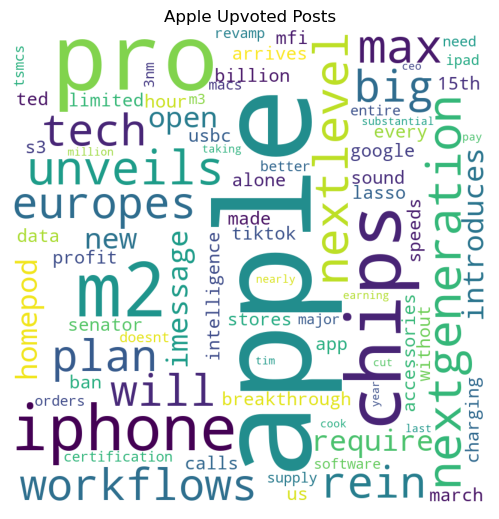

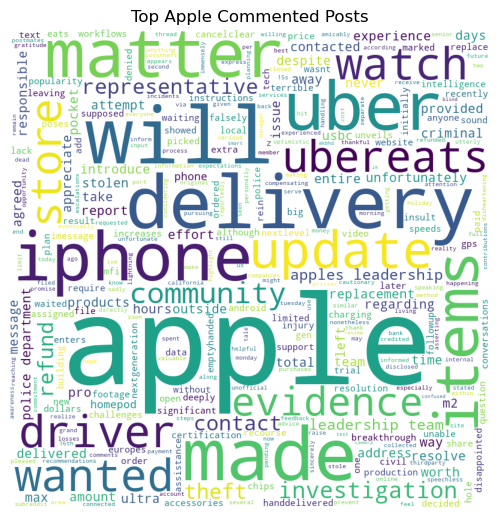

Text(0.5, 1.0, 'Top Samsung Commented Posts')

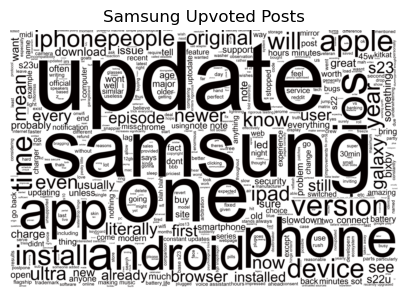

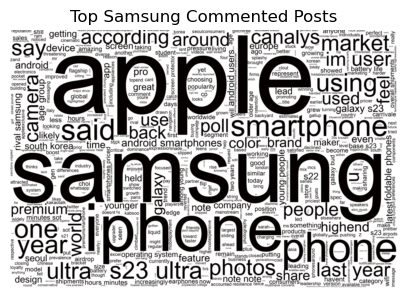

In [49]:
#wordcloud on top 20 upvoted and commented post to understand the words and context that led to it being the top 10

# 1) Create wordcloud for apple_upvoted
# Read in data
apple_upvoted = pd.read_csv('../datasets/apple_upvoted.csv', encoding='utf-8')

# Concatenate text
text = ' '.join(apple_upvoted['text_clean'].tolist())

# Create wordcloud
apple_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=3000).generate(text)

# Display the wordcloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(apple_wordcloud)
plt.axis('off')
plt.title('Apple Upvoted Posts')
plt.tight_layout(pad=0)
plt.show()

# 2) Create wordcloud for apple_commented
# Read in data
apple_commented = pd.read_csv('../datasets/apple_commented.csv', encoding='utf-8')

# Concatenate text
text = ' '.join(apple_commented['text_clean'].tolist())

# Create wordcloud
apple_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=3000).generate(text)

# Display the wordcloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(apple_wordcloud)
plt.axis('off')
plt.title('Top Apple Commented Posts')
plt.tight_layout(pad=0)
plt.show()


# 3) Create wordcloud for samsung_upvoted
# Read in data
samsung_upvoted = pd.read_csv('../datasets/samsung_upvoted.csv', encoding='utf-8')

# Concatenate text
text = ' '.join(samsung_upvoted['text_clean'].tolist())

# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=1000).generate(text)
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[5,5])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
plt.title('Samsung Upvoted Posts')


# 4) Create wordcloud for samsung_commented
# Read in data
samsung_commented = pd.read_csv('../datasets/samsung_commented.csv', encoding='utf-8')

# Concatenate text
text = ' '.join(samsung_commented['text_clean'].tolist())

# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=1000).generate(text)
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[5,5])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
plt.title('Top Samsung Commented Posts')

## Brief findings on most upvoted and commented posts


From the above wordclouds, it shows the top words in the most upvoted and commented posts from the apple and samsung reddit posts respectively. What's interesting is that under the top samsung commented posts, the word 'apple' and 'iphone' are frequently used. This shows that amongst the samsung consumers in the samsung reddits, there is a comparison of samsung products with apple products. However, within the apple most upvoted and commented posts, there is no mention of samsung products, or any samsung related words such as s23, or ultra. This can be infered to show that apple consumers are more 'silo' or focused on the apple products itself and see no value in comparing themselves against samsung. 

### Using Count Vectorizer and TF-IDF to showcase top and frequent words in the samsung and apple corpus

In [29]:
#read the datasets
df_apple = pd.read_csv('../datasets/df_apple.csv')
df_samsung = pd.read_csv('../datasets/df_samsung.csv')

In [30]:
#check
print(df_apple.info())
print('\n')
print(df_samsung.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1404 non-null   object 
 1   score         1404 non-null   int64  
 2   id            1404 non-null   object 
 3   subreddit     1404 non-null   object 
 4   url           1404 non-null   object 
 5   num_comments  1404 non-null   int64  
 6   body          663 non-null    object 
 7   created       1404 non-null   float64
 8   text          1404 non-null   object 
 9   text_clean    1404 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 109.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1436 non-null   object 
 1   score         1436 non-null   int64  
 2   id            1436 non

In [40]:
# pre-process data for the following
stop_words = set(stopwords.words("english"))

apple_corpus = []
for i in range(0, 1404):
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",df_apple['text_clean'][i])
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    apple_corpus.append(text)
    
    
samsung_corpus = []
for i in range(0, 1404):
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",df_samsung['text_clean'][i])
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    samsung_corpus.append(text)

In [41]:
#check
print(apple_corpus)
print('==\n==')
print(samsung_corpus)

['daily advice thread march welcome daily advice thread rapple thread used ask technical advice regarding apple software hardware ask question regarding buying selling apple product post short question question need answered ask away please remember adhere rule found sidebar join discord irc chat room support discord httpsdiscordggapple irc httpskiwiirccomclientircsnoonetorgapplenickchange_me note comment sorted new convenience archive httpswwwredditcomrapplesearchqauthor automoderator title dailyadvicethread ortitle dailytechsupportthread sortnewtall previous daily advice thread best viewed browser mobile type search bar authorautomoderator titledaily advice thread titledaily tech support thread without bracket including quotation mark around title author daily advice thread posted day est click timezones httpswwwwolframalphacominputi amusaest old one archived advised wait new thread post question time nearing quickest answer time', 'apple charge iphone ipad macbook battery replacemen

Text(0.5, 1.0, 'Samsung Corpus')

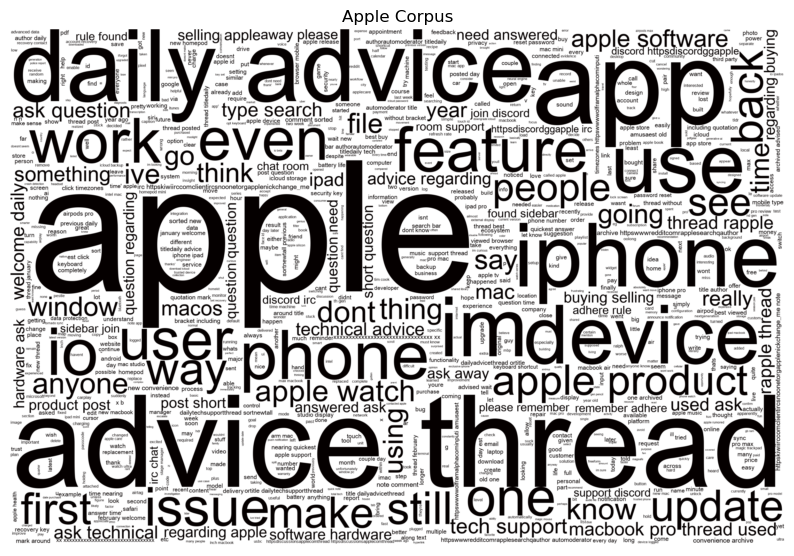

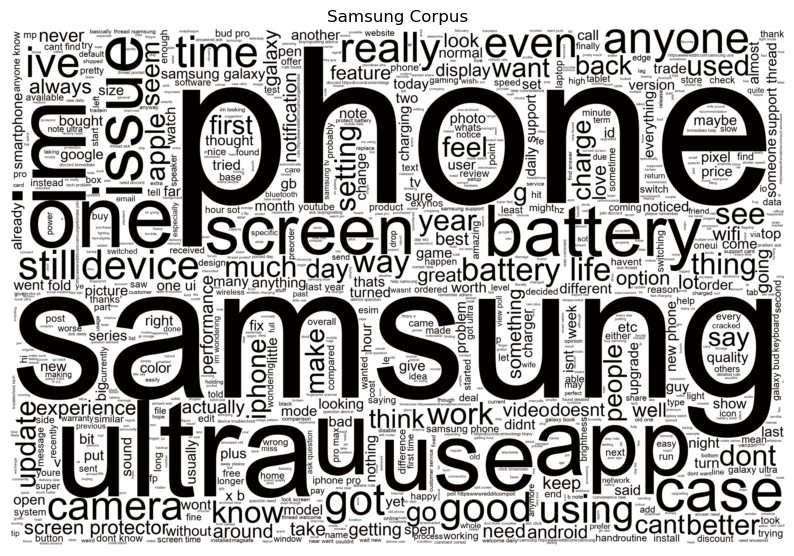

In [47]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=1000).generate(str(apple_corpus))
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[10,7])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
plt.title('Apple Corpus')


# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=1000).generate(str(samsung_corpus))
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[10,7])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
plt.title('Samsung Corpus')


From the respective samsung and apple corpus wordcloud above, after data processing (i.e. removing stop words, tags, special characters and digits) in the apple corpus, the key words show consumers seeking advice on a daily basis, talking about the features and app. 

On the samsung corpus, the key words show consumers are more concerned about the phone, screen, battery, camera and the ultra phone model. From samsung, it shows a more diverse range of topics discussed as compared to the apple corpus. 

In [34]:
# tokenized the words
apple_cvec=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
apple_words=apple_cvec.fit_transform(apple_corpus)
samsung_cvec=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
samsung_words=samsung_cvec.fit_transform(samsung_corpus)

In [35]:
print('Apple feature names')
print(apple_cvec.get_feature_names_out()[:20])
print('==\n==')
print('Samsung feature names')
print(samsung_cvec.get_feature_names_out()[:20])

Apple feature names
['___' '_lag' '_m' '_why_' 'aac' 'ability' 'able' 'able change' 'able get'
 'able go' 'able help' 'able select' 'able use' 'absolute' 'absolutely'
 'acceleration' 'accept' 'accepted' 'access' 'access account']
==
==
Samsung feature names
['aa' 'ab' 'ab test' 'ability' 'ability set' 'able' 'able find'
 'able play' 'able use' 'abnormality' 'absolute' 'absolutely'
 'absolutely love' 'absolutely nothing' 'abuse' 'accent' 'accept' 'access'
 'access picture' 'accessibility']


Text(0, 0.5, 'Words')

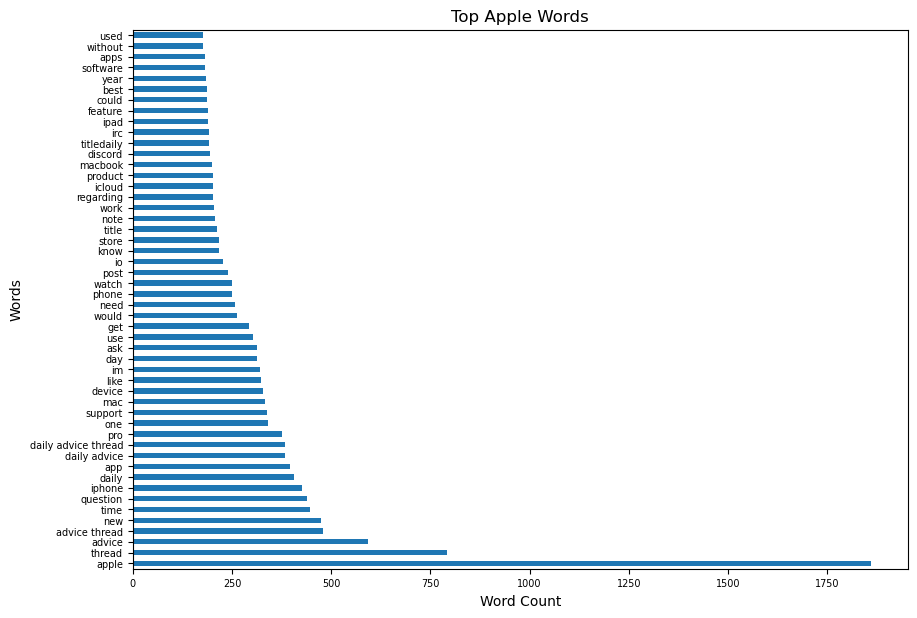

In [36]:
# convert to dataframe 
top_apple_words = pd.DataFrame(apple_words.todense(),columns=apple_cvec.get_feature_names_out())
# plot top occuring words
top_apple_words.sum().sort_values(ascending=False).head(50).plot(kind='barh',fontsize=7,figsize=(10,7));
plt.title('Top Apple Words')
plt.xlabel('Word Count')
plt.ylabel('Words')

Text(0, 0.5, 'Words')

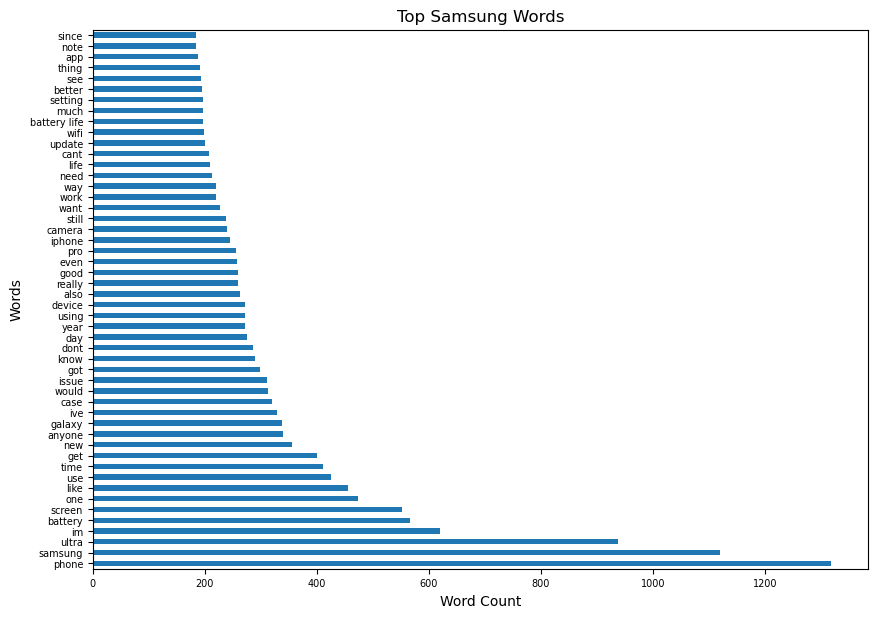

In [37]:
# convert to dataframe 
top_samsung_words = pd.DataFrame(samsung_words.todense(),columns=samsung_cvec.get_feature_names_out())
# plot top occuring words
top_samsung_words.sum().sort_values(ascending=False).head(50).plot(kind='barh',fontsize=7,figsize=(10,7));
plt.title('Top Samsung Words')
plt.xlabel('Word Count')
plt.ylabel('Words')

Text(0, 0.5, 'Words')

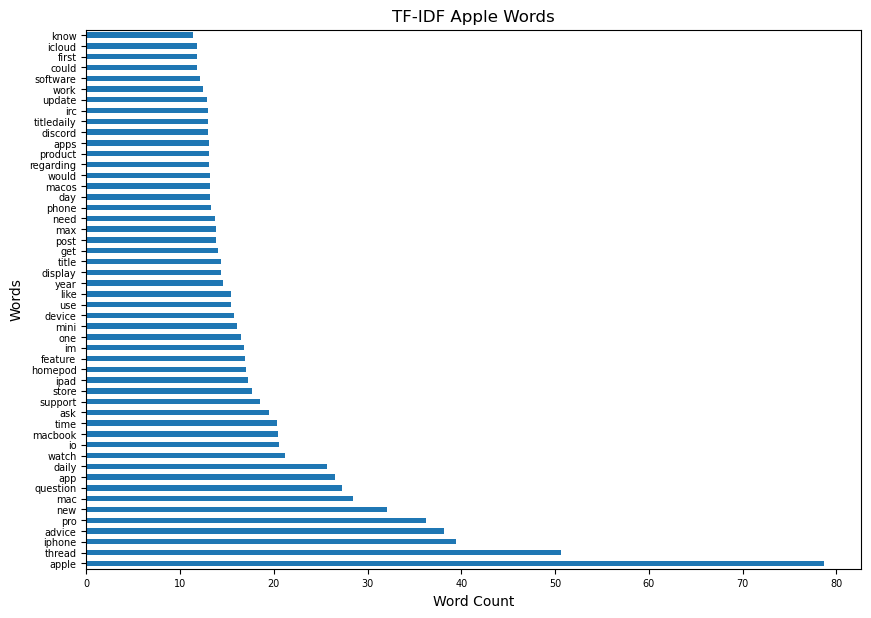

In [38]:
#tf-idf
# Instantiate and fit the transformer.
tvec = TfidfVectorizer()

# convert training data to dataframe
apple_tfidf = pd.DataFrame(tvec.fit_transform(apple_corpus).todense(), 
                          columns=tvec.get_feature_names_out())

# plot top occuring words
apple_tfidf.sum().sort_values(ascending=False).head(50).plot(kind='barh',fontsize=7,figsize=(10,7));
plt.title('TF-IDF Apple Words')
plt.xlabel('Word Count')
plt.ylabel('Words')

Text(0, 0.5, 'Words')

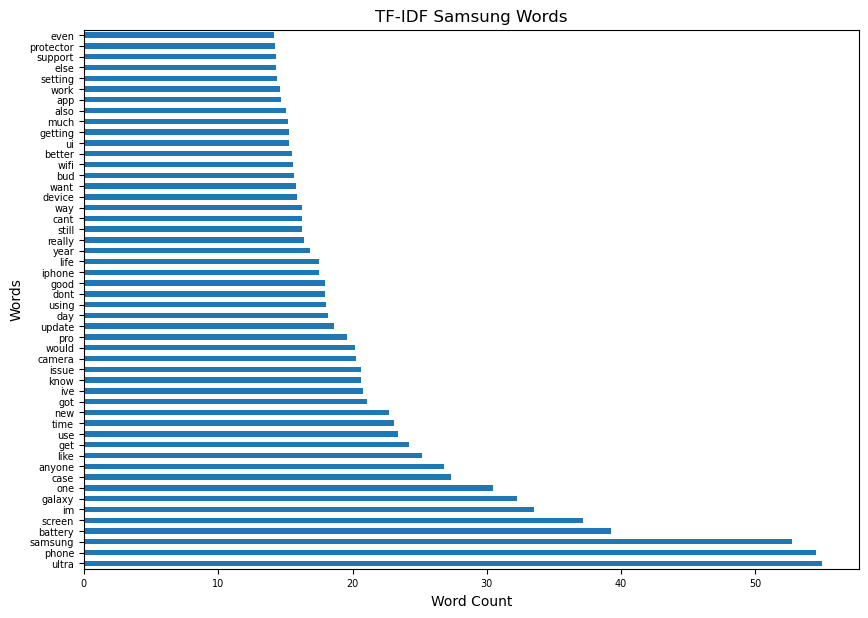

In [39]:
#tf-idf
# Instantiate and fit the transformer.
tvec = TfidfVectorizer()

# convert training data to dataframe
samsung_tfidf = pd.DataFrame(tvec.fit_transform(samsung_corpus).todense(), 
                          columns=tvec.get_feature_names_out())

# plot top occuring words
samsung_tfidf.sum().sort_values(ascending=False).head(50).plot(kind='barh',fontsize=7,figsize=(10,7));
plt.title('TF-IDF Samsung Words')
plt.xlabel('Word Count')
plt.ylabel('Words')

## Brief findings after count vectorizer and tf-idf


Some common words between both samsung and apple are update, phone, app/s,iphone, day, year, device highlighting that these words while they dont specifically point to either a samsung or apple posts, they should be excluded from the modelling stage to avoid label misclassification. This also shows that both reddits share high common words.